In [5]:
#import thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, auc, confusion_matrix, classification_report, precision_recall_curve
from sklearn import preprocessing

In [ ]:
#import file
email = pd.read_csv("./spam_email.csv") 
email.head(10) 

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.000,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.000,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.000,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.000,0.263,0.000,0.00,1.428,4,20,spam
5,0.00,0.00,0.27,0.0,0.81,0.81,0.00,2.98,0.54,0.81,...,0.000,0.040,0.000,0.565,0.121,0.00,1.617,18,131,spam
6,0.00,0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.155,0.000,0.000,0.000,0.00,2.982,28,167,ham
7,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.138,0.000,0.000,0.00,1.228,4,43,ham
8,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.377,0.000,0.125,0.000,0.00,2.925,27,158,ham
9,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,4.333,11,13,ham


In [ ]:
#Hiển thị 4601 dòng dữ liệu và 58 thuộc tính
print("Dữ liệu gốc và thuộc tính:", email.shape)

Dữ liệu gốc và thuộc tính: (4601, 58)


In [ ]:
#Xem classification
email['Class'].value_counts()

ham     2788
spam    1813
Name: Class, dtype: int64

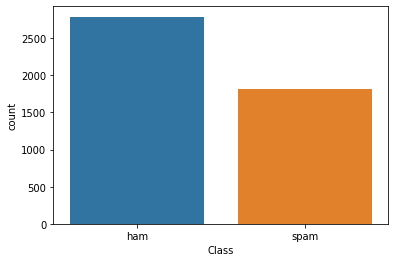

In [ ]:
#đếm số lượng C và G
#Ta thấy số lượng chưa cân đối
sns.countplot( x = email['Class'])

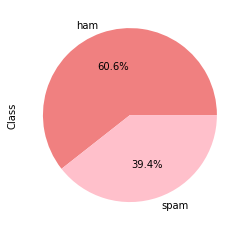

In [ ]:
#Biểu đồ tròn thể hiện phần trăm 
round(email['Class'].value_counts()/email.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])

In [ ]:
#Đổi thuộc tính Class chữ thành số 'spam' thành 1 'ham' thành -1
email['Class'] = email['Class'].map({'spam':1,'ham':-1})

In [ ]:
#sau khi chuyển chữ thành số nó sẽ ra thuộc tính như sau
#hiển thị 5 dong du lieu
email.head(5)

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,-1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,-1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,-1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,1


In [ ]:
#Thông tin chứa số cột, nhãn cột, kiểu dữ liệu cột, mức sử dụng bộ nhớ, chỉ số phạm vi và số ô trong mỗi cột (giá trị không rỗng)
email.info

<bound method DataFrame.info of       make  address   all   3d   our  over  remove  internet  order  mail  \
0     0.00     0.00  0.29  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
1     0.46     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
2     0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
3     0.33     0.44  0.37  0.0  0.14  0.11    0.00      0.07   0.97  1.16   
4     0.00     2.08  0.00  0.0  3.12  0.00    1.04      0.00   0.00  0.00   
...    ...      ...   ...  ...   ...   ...     ...       ...    ...   ...   
4596  0.00     0.00  0.53  0.0  0.00  0.53    0.00      0.00   0.00  0.53   
4597  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4598  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4599  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4600  0.13     0.26  0.52  0.0  0.26  0.00    0.13      0.00   0.00  0.39   

      ...  semicol  paren  bracket   bang  

In [ ]:
#import thư viện để tiến hành xây dựng thuật toán
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split

In [ ]:
#remove cái thuộc tính Class để tiến hành train và test
X = email.drop('Class', axis = 1)
y = email['Class']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
model = adb.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([-1, -1,  1, ..., -1, -1,  1])

#Xây dựng chương trình AdaBoost chưa qua Decesion Stump

In [ ]:
print('TEST RESULT:\n ')
# REPORT
print('Decision tree Classifier Report:\n\n{} \n' .format(classification_report(y_test, y_pred)))

res = cross_val_score(model, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

#Độ chính xác trung bình
print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, model.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(model.score( X_test, y_test)*100,2)))

TEST RESULT:
 
Decision tree Classifier Report:

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       832
           1       0.95      0.92      0.94       549

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.95      1381
weighted avg       0.95      0.95      0.95      1381
 

Average Accucy: 	0.8914

Standard Deviation: 	0.0245

Confusion Matrix :
[[808  24]
 [ 45 504]]

Accuracy Score :		95.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


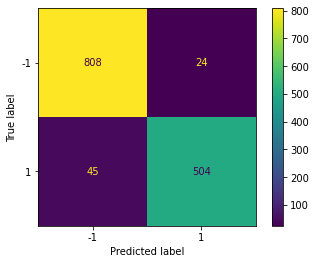

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
print ('Train Accuracy - : {}%'.format(round(model.score( X_train, y_train)*100,2)))
print ('Test Accuracy - : {}%'.format(round(model.score( X_test, y_test)*100,2)))

Train Accuracy - : 99.91%
Test Accuracy - : 95.0%


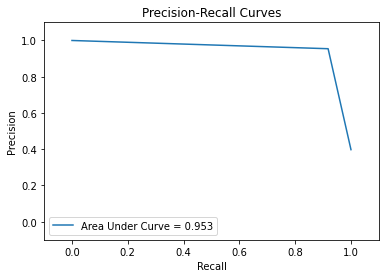

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

#Sử dụng Decision Stumps để thiết kế chương trình AdaBoost


In [ ]:
#import file
email = pd.read_csv("/content/spam_email.csv") 
email.head(10)

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.000,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.000,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.000,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.000,0.263,0.000,0.00,1.428,4,20,spam
5,0.00,0.00,0.27,0.0,0.81,0.81,0.00,2.98,0.54,0.81,...,0.000,0.040,0.000,0.565,0.121,0.00,1.617,18,131,spam
6,0.00,0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.155,0.000,0.000,0.000,0.00,2.982,28,167,ham
7,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.138,0.000,0.000,0.00,1.228,4,43,ham
8,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.377,0.000,0.125,0.000,0.00,2.925,27,158,ham
9,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,4.333,11,13,ham


In [ ]:
X = email.drop('Class', axis = 1)

y = email.Class
# Chia các dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

# Chuẩn hóa dữ liệu x_train and x_test
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
# Thay đổi dự đoán ham,spam thành -1,1
y_test_new = np.where(y_test == 'ham', -1, 1)
y_train_new = np.where(y_train == 'ham', -1, 1)

# Lớp để triển khai AdaBoost
class AdaBoostCLF:

    def __init__(self, X_train, y_train, T):
        self.x_train = X_train
        self.y_train = list(np.array(y_train).flatten())
        self.T = T
        self.N = len(self.x_train)
        self.weights =  np.ones(self.N)/self.N
        self.stumps = []  
        self.alphas = []

    def train(self):
        for t in range(self.T):
            dtc =  DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 1)
            stump = dtc.fit(self.x_train, self.y_train, sample_weight = self.weights)
            pred_train = dtc.predict(self.x_train)
            
            # Tính các lỗi được phân loại sai error, alpha
            incorrect = np.where(pred_train != self.y_train, 1, 0)
            error = np.dot(self.weights, incorrect )/(self.weights).sum(dtype = 'float')
            alpha_t = 0.5 * np.log((1 - error) / error)
            
            # Tính các hệ số pos/neg để cập nhật trọng lượng phù hợp
            weight_coeffs =  np.where(incorrect == 1 , 1, -1)
            weights = np.multiply(self.weights, np.exp(alpha_t * weight_coeffs))
            norm_weights = (weights/weights.sum(dtype = 'float'))
            
            # Cập nhật weights, stumps, cho lần lặp 
            self.weights = norm_weights
            self.stumps.append(stump)
            self.alphas.append(alpha_t)
            
    def computePredictions(self, X):
            num_classifiers = self.T
            num_records = len(X)
            
            # Khởi tạo danh sách để chứa dự đoán * alpha_t tương ứng có trọng số a * h (x) cho mỗi lần lặp
            alpha_preds = np.zeros((num_records, num_classifiers))
            
            # Lặp lại qua tất cả các bộ phân loại và tất cả các bản ghi đã cho và thêm dự đoán
            for c in range(num_classifiers):
                curr_clf = self.stumps[c] 
                curr_preds = curr_clf.predict(X)
                for i in range(num_records):
                    alpha_preds[i][c] = curr_preds[i] * self.alphas[c]
            final_preds = []
            
            # Lặp lại từng bản ghi để tính toán giả thuyết trên tất cả các bộ phân loại T
            for tr in range(num_records):
                if np.sign(sum(alpha_preds[tr])) <= 0:
                    final_preds.append(-1)
                else:
                    final_preds.append(1)
            return final_preds

In [ ]:
# Khởi tạo các giá trị lặp khác nhau để thử T
T_values = [1, 50, 100, 150]

# Khởi tạo danh sách training and testing scores
train_scores = []
test_scores = []

# Chức năng tính toán tất cả các điểm một cách chắc chắn qua các lần lặp T khác nhau
def computeScores(X_train, y_train, X_test, y_test, T_values):
    for i in range(0, len(T_values)):
        clf = AdaBoostCLF(X_train, y_train, T_values[i])
        clf.train()
        preds_train = clf.computePredictions(X_train)
        preds_test = clf.computePredictions(X_test)
        acc_score_tr = accuracy_score(y_train,preds_train)
        acc_score_tst = accuracy_score(y_test, preds_test)
        err_score_tr = 1 - acc_score_tr
        err_score_tst = 1 - acc_score_tst
        precision_tr =  precision_score(y_train, preds_train, pos_label = 1)
        precision_tst =  precision_score(y_test, preds_test, pos_label = 1)
        recall_tr =  recall_score(y_train, preds_train, pos_label = 1)
        recall_tst =  recall_score(y_test, preds_test, pos_label = 1)
        train_scores.extend(("", acc_score_tr, err_score_tr, precision_tr, recall_tr))
        test_scores.extend(("", acc_score_tst, err_score_tst, precision_tst, recall_tst))

# Gọi hàm để tính scores và điền danh sách
computeScores(X_train_scaled, y_train_new, X_test_scaled, y_test_new, T_values)

# Tạo từ điển of test/train 
scores_dict = {'training' :train_scores, 'testing' : test_scores } 

# Chuyển đổi tất cả scores thành dataframe
scoresDF = pd.DataFrame.from_dict(scores_dict)
row_names = ['1 decision stump', 'accuracy:', 'error:', 'precision:','recall:',
             '50 decision stumps', 'accuracy:', 'error:', 'precision:','recall:',
            '100 decision stumps', 'accuracy:', 'error:', 'precision:','recall:',
            '150 decision stumps', 'accuracy:', 'error:', 'precision:','recall:']

scoresDF.index = row_names
scoresDF

,training,testing
1 decision stump,,
accuracy:,0.791667,0.790331
error:,0.208333,0.209669
precision:,0.731164,0.703655
recall:,0.765919,0.772206
50 decision stumps,,
accuracy:,0.93587,0.929386
error:,0.06413,0.070614
precision:,0.932657,0.909222
recall:,0.906726,0.904011


In [ ]:
train_error = [train_scores[2], train_scores[7], train_scores[12], train_scores[17]]
test_error = [test_scores[2], test_scores[7], test_scores[12], test_scores[17]]

train_precision = [train_scores[3], train_scores[8], train_scores[13], train_scores[18]]
test_precision = [test_scores[3], test_scores[8], test_scores[13], test_scores[18]]

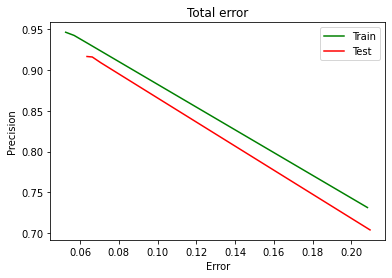

In [ ]:
plt.plot(train_error, train_precision, 'g-', label='Train')
plt.plot(test_error, test_precision, 'r-', label='Test')
plt.title('Total error')
plt.xlabel('Error')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()